In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

Alina Florencia Karuniawati

In [3]:
plt.style.use('seaborn')

In [4]:
df = pd.read_csv('hotel_bookings.csv')
pd.options.display.max_columns = None
display(df)

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
0                          0       2       0.0       0   BB     PRT   
1                          0       2       0.0       0   BB     PRT   
2                          1       1       0.0       0   BB     GBR   
3                          1       1       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     GBR   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
0              Direct               Direct                  0   
1              Direct               Direct                  0   
2              Direct               Direct                  0   
3           Corporate            Corporate                  0   
4           Online TA                TA/TO                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
0                            0                               0   
1                            0        

### Membuang Data yang memiliki kode country selain USA

In [5]:
df = df[df['country']=='USA']

### Memilah data yang kolom children dan babies bukan 0

In [6]:
df = df[(df['children']>0) | (df['babies']>0)]

### Membuang Data yang Reservation Statusnya Canceled dan No-Show

In [7]:
df = df[df['reservation_status']=='Check-Out']

### Membuang Data yang arrival date year selain 2016

In [8]:
df = df[df['arrival_date_year']==2016]

In [9]:
df

hotel  is_canceled  lead_time  arrival_date_year  \
23010   Resort Hotel            0         26               2016   
23053   Resort Hotel            0         27               2016   
24686   Resort Hotel            0          5               2016   
25295   Resort Hotel            0         57               2016   
25317   Resort Hotel            0         48               2016   
...              ...          ...        ...                ...   
102427    City Hotel            0        143               2016   
103514    City Hotel            0         89               2016   
103542    City Hotel            0         87               2016   
103546    City Hotel            0         11               2016   
103740    City Hotel            0         36               2016   

       arrival_date_month  arrival_date_week_number  \
23010               April                        15   
23053               April                        16   
24686                 May                        22   
25295                June                        25   
25317                June                        26   
...                   ...                       ...   
102427           November                        48   
103514           December                        52   
103542           December                        53   
103546           December                        53   
103740           December                        53   

        arrival_date_day_of_month  stays_in_weekend_nights  \
23010                           9                        2   
23053                          10                        2   
24686                          28                        1   
25295                          17                        2   
25317                          20                        1   
...                           ...                      ...   
102427                         24                        1   
103514                         22                        2   
103542                         25                        2   
103546                         27                        0   
103740                         30                        0   

        stays_in_week_nights  adults  children  babies meal country  \
23010                      2       3       1.0       0   BB     USA   
23053                      2       3       1.0       0   BB     USA   
24686                      1       2       2.0       0   BB     USA   
25295                      2       2       1.0       0   BB     USA   
25317                      1       2       2.0       0   BB     USA   
...                      ...     ...       ...     ...  ...     ...   
102427                     3       2       2.0       0   BB     USA   
103514                     3       2       2.0       0   BB     USA   
103542                     0       2       1.0       0   BB     USA   
103546                     1       2       2.0       0   BB     USA   
103740                     1       2       2.0       0   BB     USA   

       market_segment distribution_channel  is_repeated_guest  \
23010          Direct               Direct                  0   
23053          Direct               Direct                  0   
24686       Online TA                TA/TO                  0   
25295          Direct               Direct                  0   
25317       Online TA                TA/TO                  0   
...               ...                  ...                ...   
102427         Direct               Direct                  0   
103514      Online TA                TA/TO                  0   
103542      Online TA                TA/TO                  0   
103546         Direct               Direct                  0   
103740      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
23010                        0                               0   
23053                        0        

## Mengambil Kolom-Kolom yang Digunakan untuk Analisis

In [10]:
df1 = df[['hotel','arrival_date_month','arrival_date_day_of_month','babies','children']]

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 23010 to 103740
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hotel                      65 non-null     object 
 1   arrival_date_month         65 non-null     object 
 2   arrival_date_day_of_month  65 non-null     int64  
 3   babies                     65 non-null     int64  
 4   children                   65 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.0+ KB


Dapat dilihat bahwa pada kolom children, arrival_date_month, babies, dan arrival_date_day_of_month tipe datanya sudah sesuai dan tidak ada missing values sehingga tidak diperlukan cleaning lebih lanjut (membuang null)

## Convert Data yang Sudah Dibersihkan dalam Bentuk CSV

In [12]:
df1.to_csv('23102010073_cleaned.csv', index=False)

## Analisis

Pertanyaan : Bagaimana kenaikan dan penurunan jumlah orang yang menginap di USA bersama dengan anak-anak pada tahun 2016?

In [13]:
df1[df1['babies']==1]

hotel arrival_date_month  arrival_date_day_of_month  babies  \
27667  Resort Hotel          September                          3       1   
27926  Resort Hotel          September                         13       1   
83496    City Hotel           February                          1       1   

       children  
27667       0.0  
27926       0.0  
83496       0.0

Berdasarkan tabel di atas dapat dilihat bahwa orang yang menginap di USA bersama dengan anak-anak yang tergolong bayi hanya pada bulan September dan Februari 

(Disclaimer : Tabel ini ditujukan untuk dapat mengetahui apakah ada orang yang menginap di hotel dengan anak-anak di holiday school season, tetapi anak-anak tersebut masih tergolong bayi)

### Perubahan jumlah orang yang menginap di USA bersama dengan anak-anak pada tahun 2016

In [14]:
month = ['January','February','March','April','May','June','July','August','September','October','November','December']
lst_count = []
for i in range(len(month)):
    count = len(df1[df1['arrival_date_month']==month[i]])
    lst_count.append(count)

In [15]:
df2 = pd.DataFrame({"Count": lst_count}, index=month)

In [16]:
df2

Count
January        0
February       3
March          3
April          3
May            4
June          11
July          11
August        13
September      6
October        2
November       3
December       6

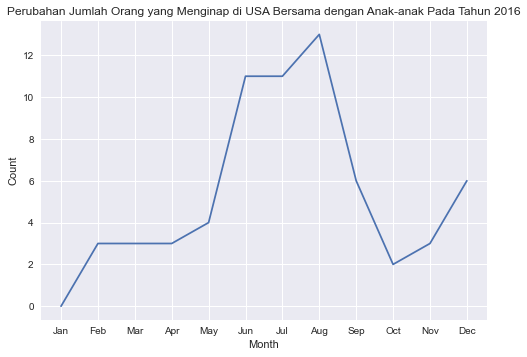

In [17]:
plt.plot(df2.index.str[0:3], df2.Count)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Perubahan Jumlah Orang yang Menginap di USA Bersama dengan Anak-anak Pada Tahun 2016')
plt.show()

In [18]:
df1[(df1['arrival_date_month']=='December')]

hotel arrival_date_month  arrival_date_day_of_month  babies  \
31569   Resort Hotel           December                         31       0   
31796   Resort Hotel           December                         30       0   
103514    City Hotel           December                         22       0   
103542    City Hotel           December                         25       0   
103546    City Hotel           December                         27       0   
103740    City Hotel           December                         30       0   

        children  
31569        2.0  
31796        2.0  
103514       2.0  
103542       1.0  
103546       2.0  
103740       2.0

Dari tabel di atas dapat dilihat bahwa orang yang menginap di USA pada bulan Desember bersama dengan anak-anak, menginapnya saat hari libur natal

In [19]:
df1[(df1['arrival_date_month']=='June')| (df1['arrival_date_month']=='July')| (df1['arrival_date_month']=='August')]

hotel arrival_date_month  arrival_date_day_of_month  babies  \
25295  Resort Hotel               June                         17       0   
25317  Resort Hotel               June                         20       0   
25319  Resort Hotel               June                         20       0   
25389  Resort Hotel               June                         23       0   
25684  Resort Hotel               July                          5       0   
25686  Resort Hotel               July                          5       0   
25694  Resort Hotel               July                          5       0   
25978  Resort Hotel               July                         14       0   
26492  Resort Hotel               July                         29       0   
27274  Resort Hotel             August                         22       0   
27322  Resort Hotel             August                         24       0   
90207    City Hotel               June                          3       0   
90934    City Hotel               June                         13       0   
90985    City Hotel               June                         12       0   
91515    City Hotel               June                         21       0   
91942    City Hotel               June                         27       0   
92093    City Hotel               June                         29       0   
92152    City Hotel               June                         29       0   
92317    City Hotel               July                          2       0   
92318    City Hotel               July                          2       0   
92357    City Hotel               July                          4       0   
92440    City Hotel               July                          1       0   
92897    City Hotel               July                         12       0   
92969    City Hotel               July                         14       0   
94286    City Hotel             August                          2       0   
94302    City Hotel             August                          2       0   
94303    City Hotel             August                          2       0   
94577    City Hotel             August                          6       0   
94723    City Hotel             August                          8       0   
95010    City Hotel             August                         12       0   
95663    City Hotel             August                         21       0   
95809    City Hotel             August                         20       0   
95835    City Hotel             August                         24       0   
95925    City Hotel             August                         23       0   
96320    City Hotel             August                         30       0   

       children  
25295       1.0  
25317       2.0  
25319       2.0  
25389       3.0  
25684       1.0  
25686       2.0  
25694       2.0  
25978       2.0  
26492       2.0  
27274       2.0  
27322       2.0  
90207       1.0  
90934       1.0  
90985       2.0  
91515       2.0  
91942       1.0  
92093       1.0  
92152       1.0  
92317       2.0  
92318       2.0  
92357       3.0  
92440       2.0  
92897       1.0  
92969       1.0  
94286       1.0  
94302       1.0  
94303       1.0  
94577       2.0  
94723       2.0  
95010       2.0  
95663       1.0  
95809       1.0  
95835       1.0  
95925       2.0  
96320       1.0

Dari tabel di atas dapat dilihat bahwa orang yang menginap di USA bersama dengan anak-anak pada bulan Juni-Agustus, anak-anak tersebut tergolong bukan bayi (children).

## Kesimpulan

1. Sejak bulan Januari hingga Mei perubahan yang terjadi tidak terlalu signifikan, bahkan jumlah orang yang menginap bersama dengan anak-anak pada bulan Februari hingga Appril 2016 stabil di angka 3
2. Setelah bulan Mei, yaitu pada bulan Juni terjadi peningkatan yang cukup signifikan hingga bulan Agustus. 
3. Setelah bulan Agustus, angka ini kembali turun hingga bulan Oktober dan kembali mengalami peningkatan di bulan November hingga Desember. 
4. Peningkatan di bulan Desember selaras dengan libur Natal yang ada di USA (tanggal 22 Desember 2016 hingga 2 Januari 2017). Hal ini dibuktikan dengan orang-orang yang menginap bersama dengan anak-anak di USA pada bulan Desember semuanya berada setelah tanggal 22 Desember atau bertepatan dengan tanggal 22 Desember (Sumber : https://www.feiertagskalender.ch/ferien.php?geo=3537&jahr=2016&hl=en)
5. Jumlah orang yang menginap di USA bersama dengan anak-anak pada tahun 2016 lebih banyak pada bulan Juni hingga Agustus. Hal ini selaras dengan hari libur sekolah di USA. Di USA pada tahun 2016, mulai tanggal 30 Mei 2016 hingga 3 Juni 2016 terdapat Spring Holiday yang kemudian di lanjut Summer Holiday pada tanggal 20 Juni 2016 hingga 30 Agustus 2016. 
(Sumber : https://www.feiertagskalender.ch/ferien.php?geo=3537&jahr=2016&hl=en)

### Perubahan jumlah orang yang menginap di USA bersama dengan anak-anak pada tahun 2016 di Masing-Masing Hotel

In [20]:
month = ['January','February','March','April','May','June','July','August','September','October','November','December']
lst_count_city = []
for i in range(len(month)):
    count = len(df1[(df1['arrival_date_month']==month[i]) & (df1.hotel=='City Hotel')])
    lst_count_city.append(count)

In [21]:
month = ['January','February','March','April','May','June','July','August','September','October','November','December']
lst_count_resort = []
for i in range(len(month)):
    count = len(df1[(df1['arrival_date_month']==month[i]) & (df1.hotel=='Resort Hotel')])
    lst_count_resort.append(count)

In [22]:
df3 = pd.DataFrame({"City_Count": lst_count_city,"Resort_Count":lst_count_resort}, index=month)

In [23]:
df3

City_Count  Resort_Count
January             0             0
February            3             0
March               3             0
April               1             2
May                 3             1
June                7             4
July                6             5
August             11             2
September           3             3
October             1             1
November            3             0
December            4             2

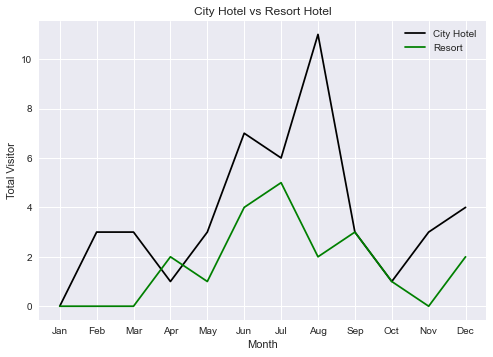

In [24]:
plt.plot(df3.index.str[0:3], df3.City_Count, label='City Hotel', color='black')
plt.plot(df3.index.str[0:3], df3.Resort_Count, label='Resort', color='green')

plt.title("City Hotel vs Resort Hotel")
plt.xlabel("Month")
plt.ylabel("Total Visitor")

plt.legend()
plt.show()

Penurunan dan peningkatan Jumlah Pengunjung di USA pada tahun 2016 di City Hotel yang menginap bersama dengan anak-anak :

1. Setelah bulan Januari terjadi peningkatan jumlah pengunjung di City Hotel sebanyak 3 orang yang datang bersama dengan anak-anak pada bulan Februari dan angka ini stabil hingga bulan Maret.
2. Setelah bulan Maret terjadi penurunan pada bulan April hingga mencapai 1 orang pengunjung. Setelah bulan April, trend orang yang menginap bersama dengan anak-anak di City Hotel cenderung meningkat hingga mencapai titik tertingginya pada bulan Agustus, yaitu sebesar 11 orang.
3. Kemudian setelah bulan Agustus jumlah pengunjung yang menginap bersama dengan anak-anak di City Hotel cenderung anjlok hingga bulan Oktober. Setelah bulan Oktober, angka ini kembali mengalami peningkatan hingga bulan Desember

Penurunan dan peningkatan Jumlah Pengunjung di USA pada tahun 2016 di Resort Hotel yang menginap bersama dengan anak-anak :

1. Hingga bulan Maret di Resort Hotel tidak ada pengunjung yang datang bersama dengan anak-anak. Kemudian pada bulan April, angka ini mengalami sedikit peningkatan sebelum kembali turun pada bulan Mei.
2. Setelah bulan Mei hingga Juli jumlah pengunjung yang datang bersama dengan anak-anak di Resort Hotel cenderung meningkat hingga mencapai titik tertingginya pada bulan Juli.
3. Setelah bulan Juli jumlah pengunjung yang datang bersama dengan anak-anak di Resort Hotel cenderung menurun hingga bulan November meskipun ada sedikit peningkatan pada bulan September.
4. Pada bulan Desember jumlah pengunjung yang datang bersama dengan anak-anak di Resort Hotel kembali meningkat seiring dengan hari libur Christmas

Secara keseluruhan, berdasarkan line chart di atas dapat dilihat bahwa :
1. Hampir di setiap bulan jumlah pengunjung yang menginap bersama anak-anak di City Hotel lebih banyak daripada Resort Hotel, kecuali pada bulan April
2. Pada bulan September dan oktober jumlah pengunjung yang menginap bersama anak-anak di City Hotel dan Resort Hotel memiliki perbandingan yang sama
3. Baik di City Hotel dan Resort Hotel pada bulan Januari tidak ada pengunjung yang menginap bersama dengan anak-anak